In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df =  pd.read_csv("D:\DataFiles\income.csv")

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
df_copy  =  df.copy()

In [5]:
df_copy["Income"] =  df["Income($)"]

In [6]:
df_copy.drop("Income($)",axis  = 1,inplace = True)

In [7]:
Income_dataset = df_copy

In [8]:
Income_dataset.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [9]:
Income_dataset.shape

(22, 3)

In [10]:
Income_dataset.isnull().sum()

Name      0
Age       0
Income    0
dtype: int64

In [11]:
Income_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22 non-null     object
 1   Age     22 non-null     int64 
 2   Income  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [12]:
Income_dataset.describe()

,Age,Income
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [25]:
#Now i do not know how many clusters i require , i will proceed for elbow method to determine the number of clusters

In [13]:
from sklearn.cluster import KMeans

In [14]:
sum_of_squares  = []
k_range =  range(1,10)# 0,1,2,3,4,5,6
for k_val in k_range:
    model_k  =  KMeans(n_clusters = k_val)
    model_k.fit(Income_dataset[["Age","Income"]])
    sum_of_squares.append(model_k.inertia_)
    


C:\Users\sdas8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sdas8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sdas8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sdas8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

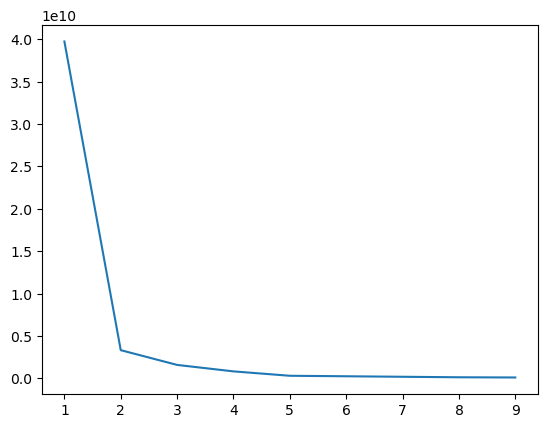

In [45]:
plt.plot(k_range,sum_of_squares)

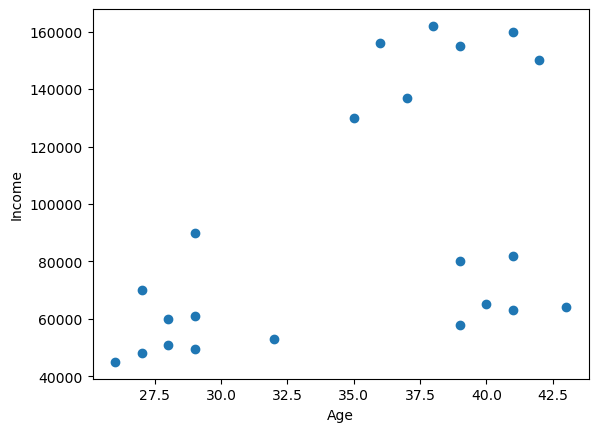

In [15]:
plt.scatter(Income_dataset.Age,Income_dataset.Income)
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [19]:
#proceeding with out scaling
kmodel  =  KMeans(n_clusters = 3)
y_prediction = kmodel.fit_predict(Income_dataset[["Age","Income"]])

C:\Users\sdas8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sdas8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
y_prediction

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [21]:
Income_dataset["cluseter_id"] = y_prediction

In [22]:
Income_dataset

,Name,Age,Income,cluseter_id
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


C:\Users\sdas8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sdas8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='Age', ylabel='Income'>

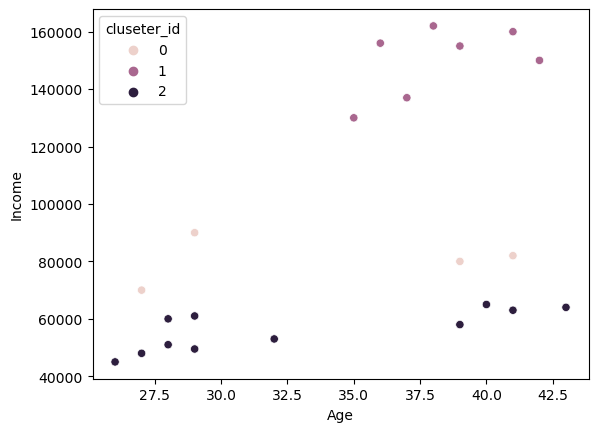

In [25]:
sns.scatterplot(data = Income_dataset,x  ="Age",y =  "Income", hue = "cluseter_id" )

In [51]:
x_cordinatesofcentroids = kmodel.cluster_centers_[:,0]

In [52]:
x_cordinatesofcentroids

array([34.        , 38.28571429, 32.90909091])

In [36]:
kmodel.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [53]:
y_cordinatesofcentroids = kmodel.cluster_centers_[:,1]

In [54]:
y_cordinatesofcentroids

array([ 80500.        , 150000.        ,  56136.36363636])

In [55]:
df1 = Income_dataset[Income_dataset["cluseter_id"] == 0]
df2 = Income_dataset[Income_dataset["cluseter_id"] == 1]
df3 = Income_dataset[Income_dataset["cluseter_id"] == 2]

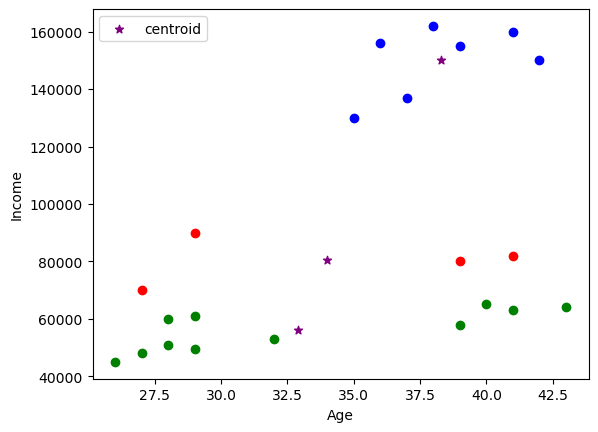

In [57]:
plt.scatter(df1.Age,df1.Income,color = "red")
plt.scatter(df2.Age,df2.Income,color = "blue")
plt.scatter(df3.Age,df3.Income,color = "green")
plt.scatter(x_cordinatesofcentroids,y_cordinatesofcentroids,color = "purple",label = "centroid",marker  = "*")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()
plt.show()

In [ ]:
# Using Scaling getting better results

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler  =  MinMaxScaler()

In [65]:
Income_dataset["Age"] = scaler.fit_transform(Income_dataset[["Age"]])

In [66]:
Income_dataset["Income"] = scaler.fit_transform(Income_dataset[["Income"]])

In [73]:
kmodel  =  KMeans(n_clusters = 3)
y_prediction = kmodel.fit_predict(Income_dataset[["Age","Income"]])

C:\Users\sdas8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sdas8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [74]:
Income_dataset["cluseter_id"] = y_prediction

<Axes: xlabel='Age', ylabel='Income'>

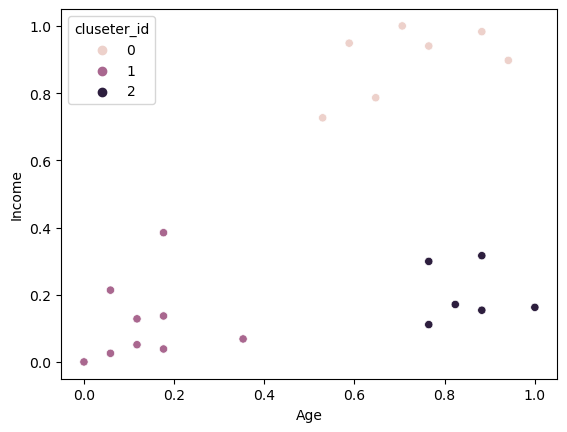

In [75]:
sns.scatterplot(data = Income_dataset,x  ="Age",y =  "Income", hue = "cluseter_id" )

In [76]:
x_cordinatesofcentroids = kmodel.cluster_centers_[:,0]

In [77]:
y_cordinatesofcentroids = kmodel.cluster_centers_[:,1]

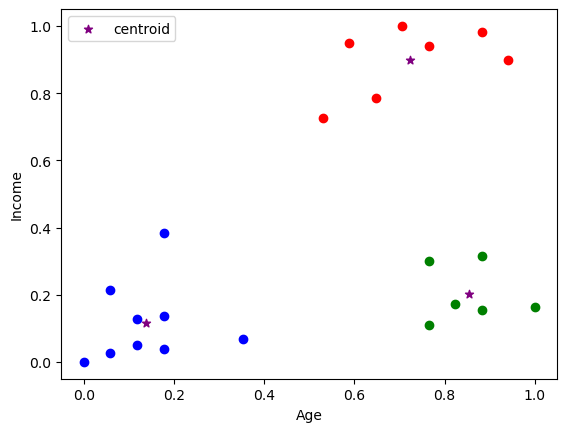

In [78]:
df1 = Income_dataset[Income_dataset["cluseter_id"] == 0]
df2 = Income_dataset[Income_dataset["cluseter_id"] == 1]
df3 = Income_dataset[Income_dataset["cluseter_id"] == 2]
plt.scatter(df1.Age,df1.Income,color = "red")
plt.scatter(df2.Age,df2.Income,color = "blue")
plt.scatter(df3.Age,df3.Income,color = "green")
plt.scatter(x_cordinatesofcentroids,y_cordinatesofcentroids,color = "purple",label = "centroid",marker  = "*")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()
plt.show()

In [79]:
sum_of_squares  = []
k_range =  range(1,10)# 0,1,2,3,4,5,6
for k_val in k_range:
    model_k  =  KMeans(n_clusters = k_val)
    model_k.fit(Income_dataset[["Age","Income"]])
    sum_of_squares.append(model_k.inertia_)
    

C:\Users\sdas8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sdas8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sdas8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sdas8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

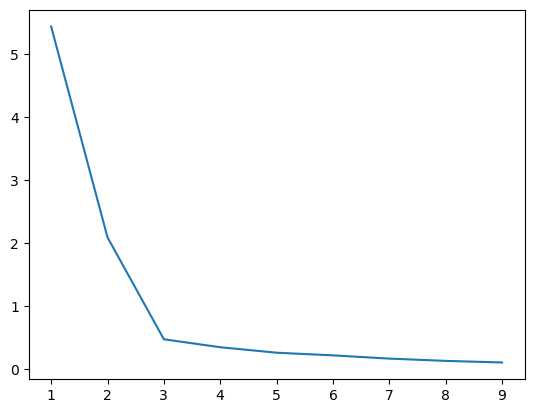

In [81]:
plt.plot(k_range,sum_of_squares)